In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
hbarr = 1
m = 1
omega = 1
N= 1000
x = np.linspace(-5,5,N)
x0 = np.array([0.,1e-5])

def potencial_armonico(x):
    return 0.5 * m * omega**2 * x**2

def numerov_refactorizado(x, x0, energia, potencial):
    h = x[1] - x[0]
    phi = np.zeros_like(x)
    phi[0], phi[1] = x0

    constante = 2 * m / hbarr**2

    for i in range(2, len(x)):
        R = [constante * (potencial(x[j]) - energia) for j in range(i-2, i+1)]
        y = [phi[i-2] * (1 - h**2 * R[0] / 12),
             2 * phi[i-1] * (1 + 5 * h**2 * R[1] / 12),
             1 - h**2 * R[2] / 12]

        phi[i] = (y[1] - y[0]) / y[2]

    return phi

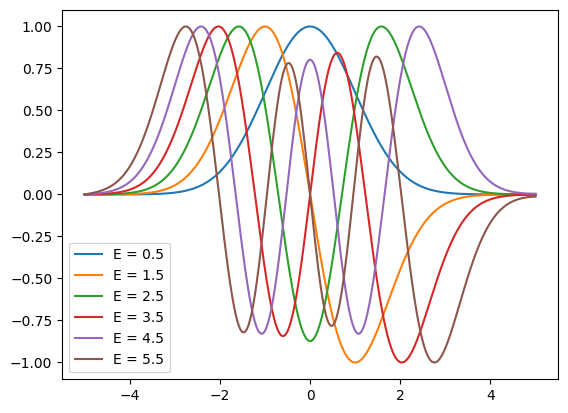

array([ 3.64816360e-06, -5.68488298e-05,  3.14967746e-04, -1.28943134e-03,
        4.38862564e-03, -1.29468998e-02])

In [36]:
e0 = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
potencial = np.zeros_like(e0)

for i in range(len(e0)):
    phi = numerov_refactorizado(x, x0, e0[i], potencial_armonico)
    phi = phi / np.max(phi)
    potencial[i] = phi[-1]

    plt.plot(x, phi, label=f'E = {e0[i]}')

plt.legend()
plt.show()

potencial

In [37]:
def gaussiano(x):
    return -10 * np.exp(-x**2 / 20)

e1 = np.array([-9.51, -8.54, -7.62, -6.74, -5.89])
potencial = np.zeros_like(e1)

for i in range(len(e1)):
    phi = numerov_refactorizado(x, x0, e1[i], gaussiano)
    potencial[i] = phi[-1]

potencial

array([ 6.94718198e+01,  1.46837580e+01, -3.44258189e-01,  5.84160968e-03,
       -4.90751748e-03])

In [38]:
def rotacional(x):
    return -(4) / ((1 + x*2)*2)

e2 = np.array([-1.478, -0.163])
potencial = np.zeros_like(e2)

for i in range(len(e2)):
    phi = numerov_refactorizado(x, x0, e2[i], rotacional)
    potencial[i] = phi[-1]

potencial

array([-3.15786513e+03,  2.01415848e-01])